## Bài tập 1. Viết chương trình dùng phương pháp chia để trị cho các bài toán sau:
1. Cho một mảng số nguyên. Tìm phần tử có giá trị lớn nhất và nhỏ nhất.
2. Cho hai ma trận vuông A, B cấp n trong đó n là lũy thừa của 2. Tìm tích
của hai ma trận trên theo phương pháp chia để trị thông thường và áp dụng
thuật toán Strassen.
3. Sử dụng thuật toán QuickSort để sắp xếp các giá trị trong một mảng các
số theo một thứ tự nào đó (có thể tăng dần hoặc giảm dần).
4. Sử dụng thuật toán MergeSort để sắp xếp các giá trị trong một mảng các
số theo một thứ tự nào đó (có thể tăng dần hoặc giảm dần).
5. Check for Majority Element in a sorted array.
6. Median of two sorted arrays of different sizes.

Đưa ra đánh giá (khuyến khích sử dụng biểu đồ) sự tăng trưởng của thời gian
thực hiện chương trình theo kích thước dữ liệu vào.

### 1. Cho một mảng số nguyên. Tìm phần tử có giá trị lớn nhất và nhỏ nhất sử dụng phương pháp chia để trị.

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

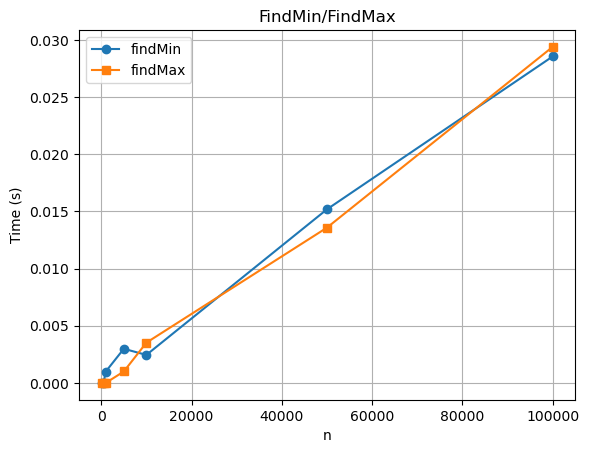

In [4]:
# Tìm phần tử có giá trị lớn nhất và nhỏ nhất.
def findMin(arr, left, right):
    if left == right:
        return arr[left]
    else:
        mid = (left + right) // 2
        min1 = findMin(arr, left, mid)
        min2 = findMin(arr, mid + 1, right)
        return min1 if min1 < min2 else min2


def findMax(arr, left, right):
    if left == right:
        return arr[left]
    else:
        mid = (left + right) // 2
        max1 = findMax(arr, left, mid)
        max2 = findMax(arr, mid + 1, right)
        return max1 if max1 > max2 else max2


sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
times_min = []
times_max = []

for size in sizes:
    arr = [random.randint(0, 1000000) for _ in range(size)]
    start_time = time.time()
    findMin(arr, 0, size - 1)
    times_min.append(time.time() - start_time)

    start_time = time.time()
    findMax(arr, 0, size - 1)
    times_max.append(time.time() - start_time)

plt.plot(sizes, times_min, label="findMin", marker='o')
plt.plot(sizes, times_max, label="findMax", marker='s')
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("FindMin/FindMax")
plt.legend()
plt.grid()
plt.show()

### Cho hai ma trận vuông A, B cấp n trong đó n là lũy thừa của 2. Tìm tích của hai ma trận trên theo phương pháp chia để trị thông thường và áp dụng thuật toán Strassen.

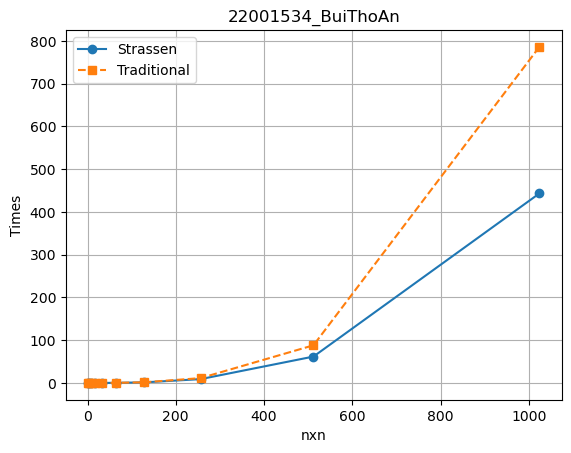

In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt


def multiplyMatrix(mtriA, mtriB):
    mtriC = np.zeros((len(mtriA), len(mtriB[0])))
    for i in range(len(mtriA)):
        for j in range(len(mtriB[0])):
            for k in range(len(mtriB)):
                mtriC[i][j] += mtriA[i][k] * mtriB[k][j]
    return mtriC


def split_matrix(matrix):
    n = matrix.shape[0]
    mid = n // 2
    return (
        matrix[:mid, :mid].copy(), matrix[:mid, mid:].copy(),
        matrix[mid:, :mid].copy(), matrix[mid:, mid:].copy()
    )


def strassen(A, B, n, threshold=64):
    if n <= threshold:  # Dùng nhân truyền thống khi N nhỏ
        return multiplyMatrix(A, B)

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    M1 = strassen(A11 + A22, B11 + B22, n // 2, threshold)
    M2 = strassen(A21 + A22, B11, n // 2, threshold)
    M3 = strassen(A11, B12 - B22, n // 2, threshold)
    M4 = strassen(A22, B21 - B11, n // 2, threshold)
    M5 = strassen(A11 + A12, B22, n // 2, threshold)
    M6 = strassen(A21 - A11, B11 + B12, n // 2, threshold)
    M7 = strassen(A12 - A22, B21 + B22, n // 2, threshold)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C


sizes = [2 ** i for i in range(1, 5)]
times_strassen = []
times_traditional = []

for size in sizes:
    A = np.random.randint(0, 10, (size, size)).astype(np.int32)
    B = np.random.randint(0, 10, (size, size)).astype(np.int32)

    start_time = time.time()
    strassen(A, B, size)
    elapsed_time_strassen = time.time() - start_time
    times_strassen.append(elapsed_time_strassen)

    start_time = time.time()
    multiplyMatrix(A, B)
    elapsed_time_traditional = time.time() - start_time
    times_traditional.append(elapsed_time_traditional)

# Vẽ biểu đồ so sánh
plt.plot(sizes, times_strassen, marker='o', linestyle='-', label='Strassen')
plt.plot(sizes, times_traditional, marker='s', linestyle='--', label='Traditional')
plt.xlabel("nxn")
plt.ylabel("Times")
plt.title("22001534_BuiThoAn")
plt.legend()
plt.grid(True)
plt.show()

### Sử dụng thuật toán QuickSort để sắp xếp các giá trị trong một mảng các số theo một thứ tự nào đó (có thể tăng dần hoặc giảm dần).

100
0.0
0.0
100
0.0
0.0
100
0.0009999275207519531
0.0
100
0.0
0.0
100
0.0
0.0010082721710205078
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.001512289047241211
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0011475086212158203
100
0.0
0.0
100
0.0
0.0
100
0.0009970664978027344
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0009992122650146484
100
0.0
0.0
100
0.0
0.0009961128234863281
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0009996891021728516
100
0.0
0.0
100
0.0
0.0
100
0.0010006427764892578
0.0
100
0.0
0.0
100
0.0
0.0
100
0.001138925552368164
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.001512289047241211
0.0
100
0.0
0.0
100
0.0
0.0010149478912353516
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.001516103744506836
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0009980201721191406
0.0
100
0.0
0.0
100
0.0
0.0009999275207519531
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0010001659393310547
0.0
100
0.0
0.0
100
0.0
0.0
100
0.0010001659393310547
0.0
10

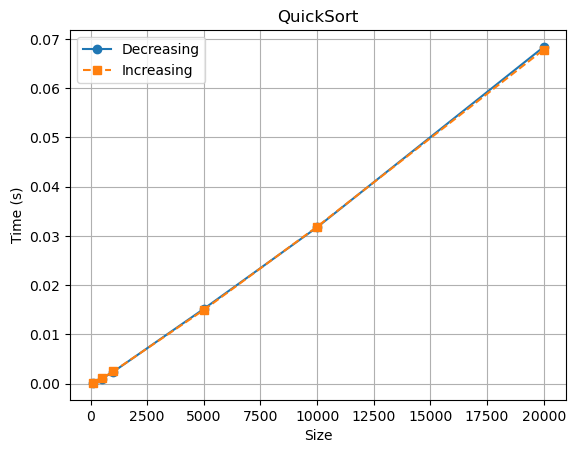

In [24]:
import time
import numpy as np
import matplotlib.pyplot as plt


def QuickSortIncreasing(a, l, r):
    i, j = l, r
    pivot = a[(l + r) // 2]
    while i <= j:
        while a[i] < pivot:
            i += 1
        while a[j] > pivot:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1
    if l < j:
        QuickSortIncreasing(a, l, j)
    if i < r:
        QuickSortIncreasing(a, i, r)
    return a


def QuickSortDecreasing(a, l, r):
    i, j = l, r
    pivot = a[(l + r) // 2]
    while i <= j:
        while a[i] > pivot:
            i += 1
        while a[j] < pivot:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1
    if l < j:
        QuickSortDecreasing(a, l, j)
    if i < r:
        QuickSortDecreasing(a, i, r)
    return a


sizes = [100, 500, 1000, 5000, 10000, 20000]
times_increasing = []
times_decreasing = []

for size in sizes:
    decreasing_times = []
    increasing_times = []

    for _ in range(100):
        print(size)
        A = np.random.randint(0, 1000, size)
        A_copy = A.copy()

        start_time = time.time()
        QuickSortDecreasing(A, 0, size - 1)
        decreasing_times.append(time.time() - start_time)
        print(time.time() - start_time)

        start_time = time.time()
        QuickSortIncreasing(A_copy, 0, size - 1)
        increasing_times.append(time.time() - start_time)
        print(time.time() - start_time)

    times_decreasing.append(np.mean(decreasing_times))
    times_increasing.append(np.mean(increasing_times))

plt.plot(sizes, times_decreasing, marker='o', linestyle='-', label='Decreasing')
plt.plot(sizes, times_increasing, marker='s', linestyle='--', label='Increasing')
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.title("QuickSort")
plt.legend()
plt.grid(True)
plt.show()

## 4. Sử dụng thuật toán MergeSort để sắp xếp các giá trị trong một mảng các số theo một thứ tự nào đó (có thể tăng dần hoặc giảm dần).


100
0.0007069000275805593
0.0007502000080421567
100
0.0006686999695375562
0.000763299991376698
100
0.000699399970471859
0.0007464999798685312
100
0.0006573999999091029
0.0007177999941632152
100
0.0006844000890851021
0.0008249999955296516
100
0.0007521000225096941
0.0007313999813050032
100
0.0006479000439867377
0.0007584000704810023
100
0.0006511000683531165
0.0007048000115901232
100
0.0006340999389067292
0.0006924000335857272
100
0.0006466000340878963
0.0007557000499218702
100
0.000649999943561852
0.0007136999629437923
100
0.0006373000796884298
0.000730500090867281
100
0.0006611000280827284
0.0007187000010162592
100
0.0006798999384045601
0.000743800075724721
100
0.0006474999245256186
0.000763899995945394
100
0.0006267999997362494
0.0006841999711468816
100
0.0006111999973654747
0.000682600075379014
100
0.0006287000142037868
0.0007105999393388629
100
0.0006455000257119536
0.0006920000305399299
100
0.0006308999145403504
0.0006839999696239829
100
0.0006035000551491976
0.0006874999962747097

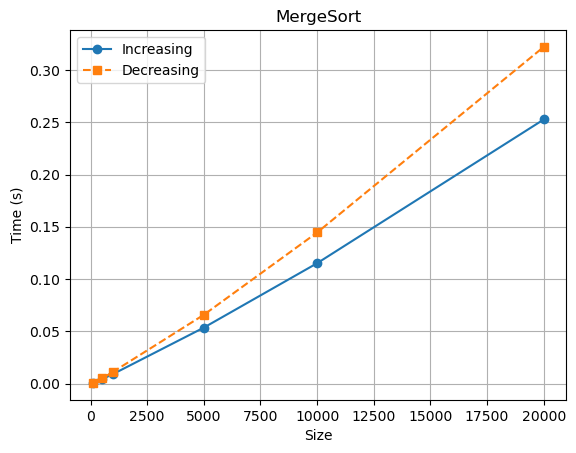

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt


def merge(arr, left, mid, right, increasing=True):
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        if (L[i] <= R[j]) == increasing:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1


def merge_sort(arr, left, right, increasing=True):
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid, increasing)
        merge_sort(arr, mid + 1, right, increasing)
        merge(arr, left, mid, right, increasing)


def merge_sort_increasing(arr):
    merge_sort(arr, 0, len(arr) - 1, increasing=True)


def merge_sort_decreasing(arr):
    merge_sort(arr, 0, len(arr) - 1, increasing=False)


sizes = [100, 500, 1000, 5000, 10000, 20000]
times_increasing = []
times_decreasing = []

for size in sizes:
    increasing_times = []
    decreasing_times = []

    for _ in range(50):
        print(size)
        A = np.random.randint(0, 1000, size)

        for sort_func, times in [(merge_sort_increasing, increasing_times),
                                 (merge_sort_decreasing, decreasing_times)]:
            A_copy = A.copy()
            start_time = time.perf_counter()
            sort_func(A_copy)
            times.append(time.perf_counter() - start_time)
            print(time.perf_counter() - start_time)

    times_increasing.append(np.mean(increasing_times))
    times_decreasing.append(np.mean(decreasing_times))

plt.plot(sizes, times_increasing, marker='o', linestyle='-', label='Increasing')
plt.plot(sizes, times_decreasing, marker='s', linestyle='--', label='Decreasing')
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.title("MergeSort")
plt.legend()
plt.grid(True)
plt.show()

## 5. Check for Majority Element in a sorted array.


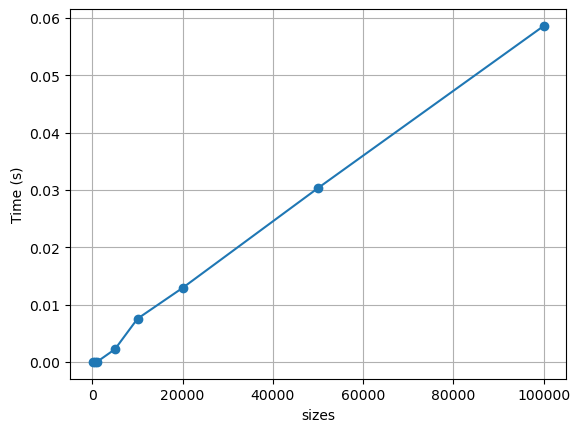

In [35]:
import time
import random
import matplotlib.pyplot as plt


def majority_element_dnc(arr, left, right):
    if left == right:
        return arr[left]

    mid = (left + right) // 2
    left_major = majority_element_dnc(arr, left, mid)
    right_major = majority_element_dnc(arr, mid + 1, right)

    if left_major == right_major:
        return left_major

    left_count = sum(1 for i in range(left, right + 1) if arr[i] == left_major)
    right_count = sum(1 for i in range(left, right + 1) if arr[i] == right_major)

    return left_major if left_count > (right - left + 1) // 2 else right_major if right_count > (
            right - left + 1) // 2 else None


sizes = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]
times = []

for size in sizes:
    arr = sorted([random.randint(1, 10) for _ in range(size)])  # Tạo mảng đã sắp xếp
    start_time = time.time()
    majority_element_dnc(arr, 0, len(arr) - 1)
    end_time = time.time()
    times.append(end_time - start_time)

plt.plot(sizes, times, marker='o', linestyle='-')
plt.xlabel('sizes')
plt.ylabel('Time (s)')
plt.grid()
plt.show()


## 6. Median of two sorted arrays of different sizes.

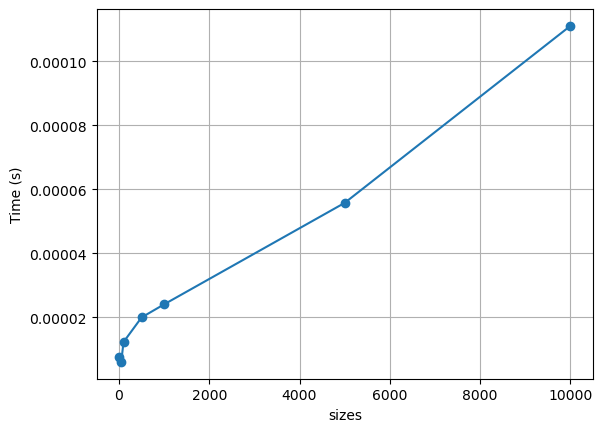

In [53]:
import time
import random
import matplotlib.pyplot as plt


def median_of_two_sorted_arrays(arr1, arr2):
    def kth_smallest(arr1, arr2, k):
        if not arr1:
            return arr2[k]
        if not arr2:
            return arr1[k]

        mid1, mid2 = len(arr1) // 2, len(arr2) // 2
        median1, median2 = arr1[mid1], arr2[mid2]

        if mid1 + mid2 < k:
            if median1 < median2:
                return kth_smallest(arr1[mid1 + 1:], arr2, k - mid1 - 1)
            else:
                return kth_smallest(arr1, arr2[mid2 + 1:], k - mid2 - 1)
        else:
            if median1 < median2:
                return kth_smallest(arr1, arr2[:mid2], k)
            else:
                return kth_smallest(arr1[:mid1], arr2, k)

    total_len = len(arr1) + len(arr2)
    if total_len % 2 == 1:
        return kth_smallest(arr1, arr2, total_len // 2)
    else:
        return (kth_smallest(arr1, arr2, total_len // 2 - 1) + kth_smallest(arr1, arr2, total_len // 2)) / 2


sizes = [10, 50, 100, 500, 1000, 5000, 10000]
times = []

for size in sizes:
    arr1 = sorted(random.sample(range(100000), size))
    arr2 = sorted(random.sample(range(100000), size // 2))

    start = time.perf_counter()
    median_of_two_sorted_arrays(arr1, arr2)
    end = time.perf_counter()

    times.append(end - start)

plt.plot(sizes, times, marker='o', linestyle='-')
plt.xlabel('sizes')
plt.ylabel('Time (s)')
plt.grid()
plt.show()
